<a href="https://colab.research.google.com/github/Emman-sys/MovieAI/blob/main/EmmanuellePranada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the dataset

### Subtask:
Load the movie dataset from the specified path into a pandas DataFrame.


In [45]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/movie_statistic_dataset.csv')

## Data exploration

### Subtask:
Perform initial data exploration using `head()`, `shape`, and `info()`.


**Reasoning**:
Display the first 5 rows, the shape, and the info of the dataframe to perform initial data exploration as requested.



In [46]:
display(df.head())
print(df.shape)
df.info()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


(4380, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB


## Handle missing data

### Subtask:
Address any missing values in the dataset.


**Reasoning**:
Check for missing values in the DataFrame.



In [47]:
print(df.isnull().sum())

movie_title             0
production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64


## Preprocess genre data

### Subtask:
Convert the 'genre' column into numerical equivalents and tally the genres for visualization.


**Reasoning**:
Split the 'genres' column, create a one-hot encoded DataFrame for genres, and count genre occurrences.



In [48]:
df['genres_list'] = df['genres'].str.split(',')
all_genres = sorted(list(set([genre for genres_list in df['genres_list'] for genre in genres_list])))
genre_df = pd.DataFrame({genre: df['genres_list'].apply(lambda x: 1 if genre in x else 0) for genre in all_genres})
genre_counts = genre_df.sum().sort_values(ascending=False)
display(genre_counts)

,0
Drama,2210
Comedy,1656
Action,1211
Adventure,968
Crime,780
Romance,724
Thriller,668
Horror,456
Mystery,409
Sci-Fi,379


## Visualize genres

### Subtask:
Create a graph to visualize the tallied genres.


**Reasoning**:
Generate a bar plot to visualize the distribution of genres based on the tallied counts.



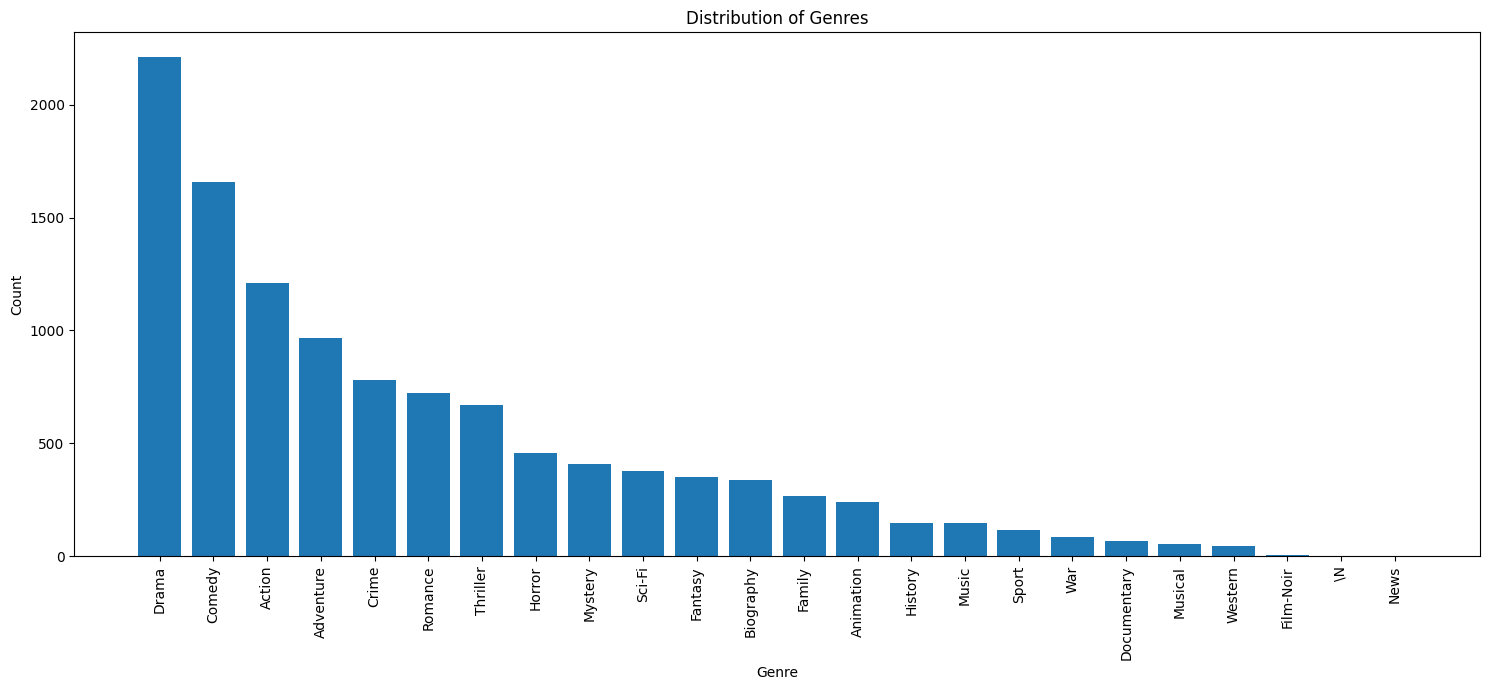

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Select relevant features

### Subtask:
Drop irrelevant columns like 'movie_title', 'director_name', 'director_professions', 'director_birthYear', and 'director_deathYear'.


**Reasoning**:
Create a list of columns to drop and use the drop method to remove them from the DataFrame.



In [50]:
columns_to_drop = ['movie_title', 'director_name', 'director_professions', 'director_birthYear', 'director_deathYear']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
display(df.head())

,production_date,genres,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,genres_list
0,2022-12-09,"Action,Adventure,Fantasy",192.0,7.8,277543.0,7.061101,460000000,667830256,2265935552,"[Action, Adventure, Fantasy]"
1,2019-04-23,"Action,Adventure,Drama",181.0,8.4,1143642.0,8.489533,400000000,858373000,2794731755,"[Action, Adventure, Drama]"
2,2011-05-20,"Action,Adventure,Fantasy",137.0,6.6,533763.0,6.272064,379000000,241071802,1045713802,"[Action, Adventure, Fantasy]"
3,2015-04-22,"Action,Adventure,Sci-Fi",141.0,7.3,870573.0,7.214013,365000000,459005868,1395316979,"[Action, Adventure, Sci-Fi]"
4,2018-04-25,"Action,Adventure,Sci-Fi",149.0,8.4,1091968.0,8.460958,300000000,678815482,2048359754,"[Action, Adventure, Sci-Fi]"


## Correlation heatmaps

### Subtask:
Generate correlation heatmaps for the genre features and the remaining numerical features.


**Reasoning**:
Concatenate the genre features with the remaining numerical features, calculate the correlation matrix, and generate heatmaps for both the combined features and just the genre features to visualize correlations.



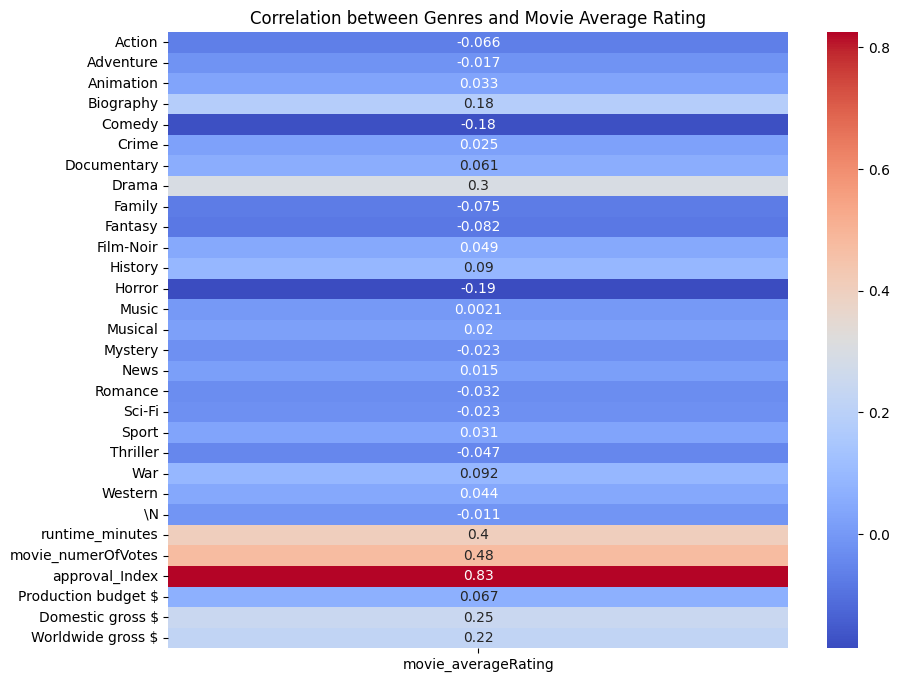

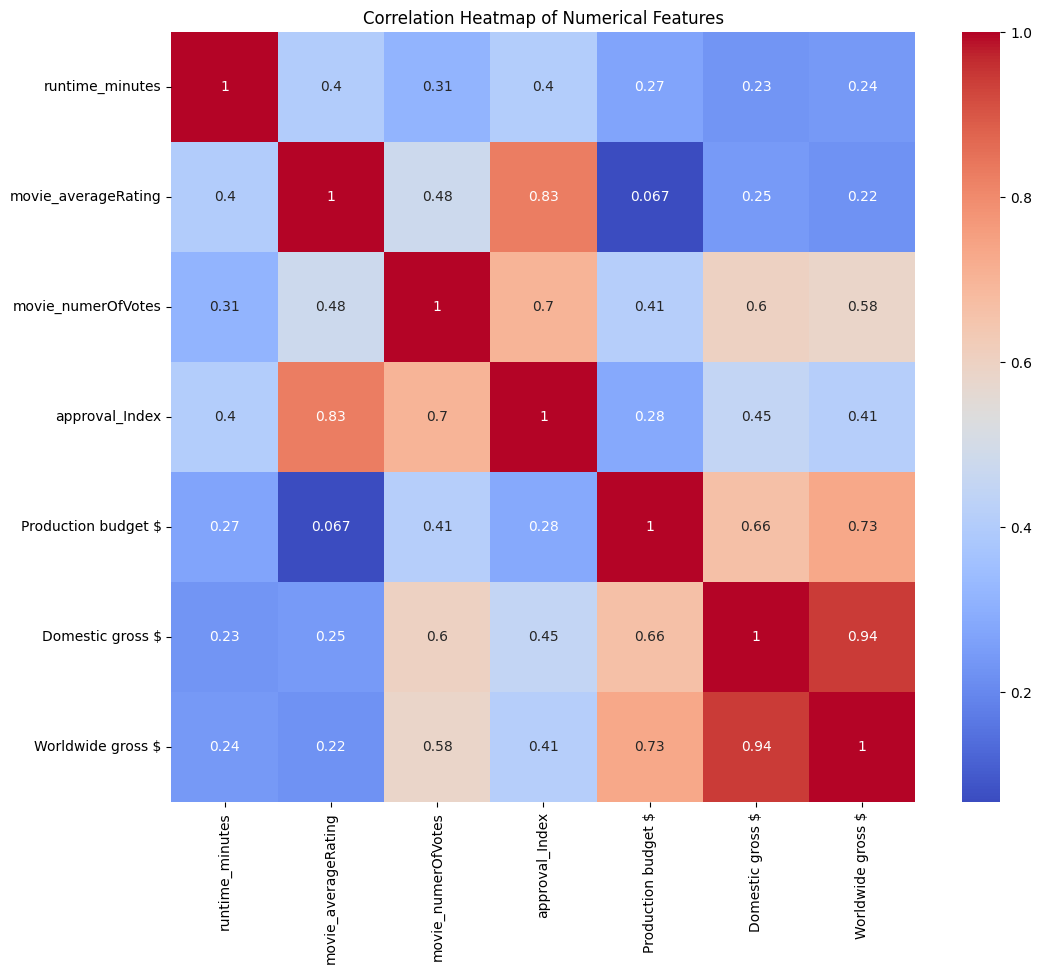

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_cols]
combined_df = pd.concat([genre_df, numerical_df], axis=1)

# Correlation heatmap of genres to rating
genre_rating_corr = combined_df.corr()[['movie_averageRating']].drop('movie_averageRating')
plt.figure(figsize=(10, 8))
sns.heatmap(genre_rating_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Genres and Movie Average Rating')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Split data

### Subtask:
Split the dataset into training (80%) and testing (20%) sets.


**Reasoning**:
Define the target variable and feature set, then split the data into training and testing sets.



In [52]:
from sklearn.model_selection import train_test_split

y = (combined_df['movie_averageRating'] > 6).astype(int)
X = combined_df.drop(columns=['production_date', 'genres', 'genres_list', 'movie_averageRating'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (3504, 30)
Testing set shape: (876, 30)


## Feature scaling

### Subtask:
Apply feature scaling to the training and testing sets for both SVM and Decision Tree models.


**Reasoning**:
Apply feature scaling to the training and testing sets for both SVM and Decision Tree models by instantiating a StandardScaler, fitting it to the training data, and transforming both training and testing data.



In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training features scaled.")
print("Testing features scaled.")

Training features scaled.
Testing features scaled.


## Build models

### Subtask:
Build and train the SVM and Decision Tree models.


**Reasoning**:
Build and train the SVM and Decision Tree models using the scaled training data.



In [54]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("SVM model trained.")
print("Decision Tree model trained.")

SVM model trained.
Decision Tree model trained.


## Evaluate models

### Subtask:
Evaluate the trained models using the test set and cross-validation.


**Reasoning**:
Evaluate the trained models using the test set and cross-validation as per the instructions.



In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

svm_pred = svm_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

svm_precision = precision_score(y_test, svm_pred)
dt_precision = precision_score(y_test, dt_pred)

svm_recall = recall_score(y_test, svm_pred)
dt_recall = recall_score(y_test, dt_pred)

svm_f1 = f1_score(y_test, svm_pred)
dt_f1 = f1_score(y_test, dt_pred)


svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)

print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
print(f"SVM Test Precision: {svm_precision:.4f}")
print(f"SVM Test Recall: {svm_recall:.4f}")
print(f"SVM Test F1-score: {svm_f1:.4f}")
print("-" * 20)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Test Precision: {dt_precision:.4f}")
print(f"Decision Tree Test Recall: {dt_recall:.4f}")
print(f"Decision Tree Test F1-score: {dt_f1:.4f}")
print("-" * 20)
print(f"SVM Mean Cross-Validation Accuracy: {svm_cv_scores.mean():.4f}")
print(f"Decision Tree Mean Cross-Validation Accuracy: {dt_cv_scores.mean():.4f}")

SVM Test Accuracy: 0.9201
SVM Test Precision: 0.9281
SVM Test Recall: 0.9587
SVM Test F1-score: 0.9432
--------------------
Decision Tree Test Accuracy: 0.9623
Decision Tree Test Precision: 0.9736
Decision Tree Test Recall: 0.9719
Decision Tree Test F1-score: 0.9727
--------------------
SVM Mean Cross-Validation Accuracy: 0.9027
Decision Tree Mean Cross-Validation Accuracy: 0.9620


## Download models

### Subtask:
Save both trained models as `.pkl` files.


**Reasoning**:
Import the joblib library and save the trained models to .pkl files.



In [56]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')

print("Models saved successfully.")

Models saved successfully.


## Test loaded models

### Subtask:
Load the saved models and test their accuracy as specified in the user's prompt.


**Reasoning**:
Load the saved models and then evaluate their accuracy using the test set.



In [57]:
import joblib
from sklearn.metrics import accuracy_score

loaded_svm_model = joblib.load('svm_model.pkl')
loaded_dt_model = joblib.load('dt_model.pkl')

svm_pred_loaded = loaded_svm_model.predict(X_test_scaled)
dt_pred_loaded = loaded_dt_model.predict(X_test_scaled)

svm_accuracy_loaded = accuracy_score(y_test, svm_pred_loaded)
dt_accuracy_loaded = accuracy_score(y_test, dt_pred_loaded)

print(f"Loaded SVM Model Test Accuracy: {svm_accuracy_loaded:.4f}")
print(f"Loaded Decision Tree Model Test Accuracy: {dt_accuracy_loaded:.4f}")

Loaded SVM Model Test Accuracy: 0.9201
Loaded Decision Tree Model Test Accuracy: 0.9623
